# Operationalizing Finite Differences

Today you learned to write an algorithm that can compute the derivative of any function.

With a set of `x` values, a set of `y` values, and a position `at_x` that you want to know the derivative, the finite different method gives you the answer without calculus or formal mathematics.

The code that we have for computing finite differences isn't ready for production yet, however. We need to create a new function that takes in only the values above and draws a graph just like the ones we drew this morning.



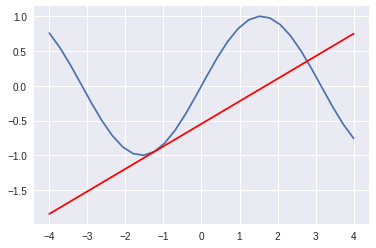

In [17]:
# LAMBDA SCHOOL
# 
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

x = np.linspace(-4,4,30)
y = np.sin(x)
plt.plot(x,y);
plt.plot(x,x*np.cos(-1.2413)-0.546,'r');

# Assignment

The code that was written previously was only slightly more general
than the example above (don't use this example for your assignment).
Copy the code from our previous work and refactor it into a general form.

The form your new code should take is as a function that plots a graph and returns a single value:

```
def compute_and_plot_derivative(x_values, y_values, at_x):
  # plot the graph above using only the x_values, y_values, and
  # the point where the derivative should be calculated
```

So, basing your function on the data in the above example, your function

Computing derivative at x = -4.0


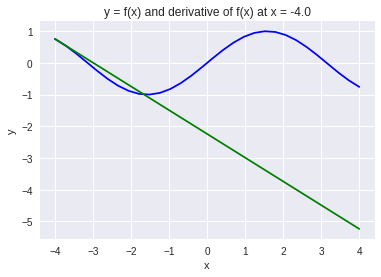

Computing derivative at x = 4.0


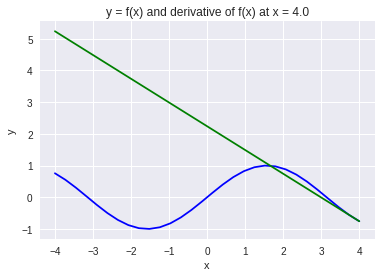

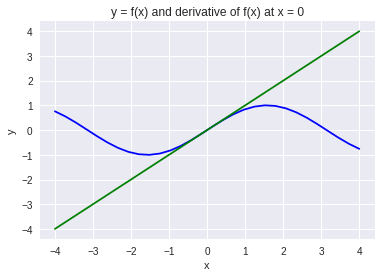

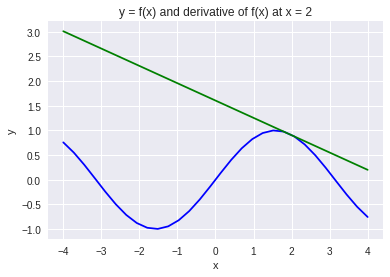

-0.35138046758081454


In [18]:
# Your code here

def compute_and_plot_derivative(x_values, y_values, at_x):
    
    
    x_values, y_values = np.array(x_values), np.array(y_values)
    
    # check for edge cases
    diff = len(x_values) - len(y_values)
    if diff > 0:
        print("More x than y values, padding with last y")
        constant = y_values[-1]
        new_y = np.ones(diff)*constant
        y_values = np.append(y_values, new_y)
    elif diff < 0:
        print("More y than x values, padding with ordered x values")
        increment = x_values[-1] - x_values[-2]
        new_x = np.array([n * increment for n in range(1, diff+1)])
        x_values = np.append(x_values, new_x)
        
    
    x_min, x_max = x_values.min(), x_values.max()
    if at_x <= x_min:
        print("Computing derivative at x = {}".format(x_min))
        ix = 0
        at_x = x_min
    elif at_x >= x_max:
        print("Computing derivative at x = {}".format(x_max))
        ix = -2
        at_x = x_max
    else:
        ix = np.argmax(x_values[x_values<=at_x])
    
    # compute derivative
    dx = (y_values[ix+1]-y_values[ix]) / (x_values[ix+1]-x_values[ix])
    tangent_line_b = y_values[ix] - (dx * x_values[ix])
    tangent_line_y = dx*x_values + tangent_line_b
    
    # plot curves
    plt.plot(x_values, y_values, 'b');
    plt.plot(x_values, tangent_line_y, 'g');
    plt.title("y = f(x) and derivative of f(x) at x = {}".format(at_x))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    
    return dx
    

d_x = compute_and_plot_derivative(x,y,-5)
d_x = compute_and_plot_derivative(x,y,5)
d_x = compute_and_plot_derivative(x,y,0)
d_x = compute_and_plot_derivative(x,y,2)
print(d_x)

Should plot the identical graph above (with embellishments like title and x and y axis labels).

`d_x` should now be nearly equal to `0.32356649113298463`. If you pass in more values for x and y,
`d_x` will be closer to the value above. If you pass in fewer values, it will be farther from that value.

Your function should work without further modification for the following datasets:

In [0]:
x1 = [0.28168026, 0.34134277, 0.42081375, 0.55130831, 0.6057354,  0.84103564,
 1.31257415, 1.56321831, 2.01270236, 2.66082013, 2.74666207, 3.00984887,
 3.39409509, 3.42475852, 3.65114374, 4.06170381, 4.1513843,  4.24649991,
 4.32139399, 4.55842455, 4.58983727, 4.77012005, 4.9475257,  5.34005008,
 5.85765093]
y1 = [ 0.46362527,  0.73294001,  0.81911768,  0.62397262,  0.7422717,   1.01723695,
  1.13183671,  1.10449711,  1.06942397,  0.71061695,  0.69012134,  0.57428101,
 -0.08959229,  0.27030529, -0.36016325, -0.43129598, -0.56491708, -0.79603396,
 -0.81514831, -0.61327031, -0.55086764, -0.49335908, -0.45672164, -0.71166013,
 -0.29851956]

x2 = [0.,         0.2166615, 0.4333231, 0.6499846, 0.8666462, 1.08330781,
 1.2999693, 1.5166309, 1.733292,  1.9499540, 2.1666156, 2.38327719,
 2.5999387, 2.8166003, 3.0332618, 3.2499234, 3.46658,   3.68324656,
 3.8999081, 4.1165696, 4.3332312, 4.5498928, 4.7665543, 4.98321593,
 5.199877,  5.4165390, 5.6332006, 5.8498621, 6.0665237, 6.28318531]
y2 = [ 0.46362527,  0.73294001,  0.81911768,  0.62397262,  0.7422717,   1.01723695,
  1.13183671,  1.10449711,  1.06942397,  0.71061695,  0.69012134,  0.57428101,
 -0.08959229,  0.27030529, -0.36016325, -0.43129598, -0.56491708, -0.79603396,
 -0.81514831, -0.61327031, -0.55086764, -0.49335908, -0.45672164, -0.71166013,
 -0.29851956]

x3 = np.linspace(0,100,100)
y3 = [  729.4845574,   475.0611947,   240.4334393,    30.50742381, 
   604.6297222,   125.2957177,   691.5316061,   964.99667096,   
   816.2554258,   495.3598346,   436.4968649,   740.25559021, 
   654.6646517,   405.6278470,   834.145555,    946.09877511, 
   624.2559070,   417.7937437,   419.0277195,  1013.62961384, 
   415.5010489,   982.3249083,   661.5300339,   571.99223687, 
   758.4703045,  1303.4854509,  1285.4455239,  1113.55460835, 
   958.4500553,  1207.6332111,  1072.597021,   1453.33283097, 
  1514.1042319,  1468.8522200,  1284.8464918,  1796.22727441, 
  1404.3618423,  1460.4388066,  1907.1800181,  2053.43061338, 
  2058.0458032,  2254.6010678,  2104.2686325,  2149.82884562, 
  2249.1117060,  2095.856127,   2500.1958041,  2470.42411986, 
  2796.7721020,  2870.5968791,  2834.5997074,  3008.92287301, 
  2880.4797099,  3272.9992026,  3215.4994201,  3388.38227248,  
  3411.2486252,  3548.7569331,  3619.7782283,  3899.48776262, 
  3685.4539117,  4150.8195193,  4288.5293686,  4054.25566034, 
  4192.4240062,  4349.9710545,  4581.8661462,  4878.36904006, 
  4908.3195941,  5002.2830186,  5226.009621,   5214.61440768, 
  5530.0910824,  5538.2984363,  5759.8429944,  5889.15936743, 
  5978.4718852,  6225.8627877,  6362.5612389,  6449.20108997, 
  6578.3555966,  6875.4707470,  6883.7796190,  7075.2665726, 
  7346.7711977,  7425.530464,   7553.7317341,  7769.85008695, 
  7914.2513686,  8098.076264,   8297.6332247,  8489.09433195, 
  8672.5214491,  8881.6744658,  9024.458000,   9233.57494599, 
  9413.8406213,  9619.3855005,  9799.8070203, 10000.        ]

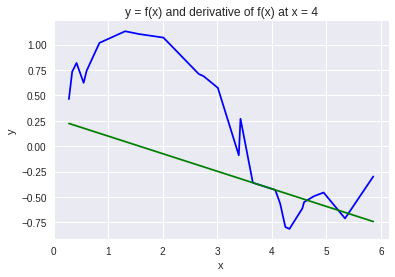

dx = -0.17325778904899364
More x than y values, padding with last y


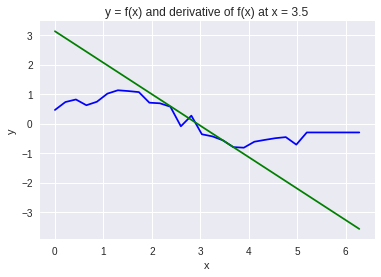

dx = -1.0666938174492635


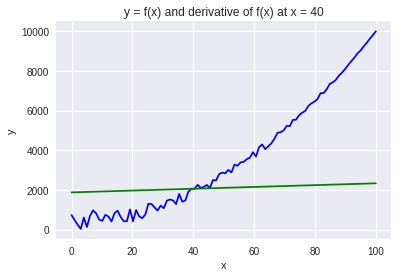

dx = 4.569037921800066


In [20]:
d_x = compute_and_plot_derivative(x1,y1,4)
print("dx = {}".format(d_x))

d_x = compute_and_plot_derivative(x2,y2,3.5)
print("dx = {}".format(d_x))

d_x = compute_and_plot_derivative(x3,y3,40)
print("dx = {}".format(d_x))

Plus two more interesting datasets of your own choosing.

In [0]:
# from age 25-54 labor participation rate
# https://www.gapminder.org/data/

years = '1980	1981	1982	1983	1984	1985	1986	1987	1988	1989	1990	1991	1992	1993	1994	1995	1996	1997	1998	1999	2000	2001	2002	2003	2004	2005	2006	2007'
canada = '77.40000153	78.80000305	78.69999695	79.40000153	80.09999847	81.09999847	82	82.69999695	83.40000153	84.09999847	84.30000305	84.19999695	83.40000153	83.59999847	83.40000153	83.30000305	83.40000153	83.90000153	84.30000305	84.69999695	84.80000305	85.09999847	85.90000153	86.40000153	86.59999847	86.30000305	86.19999695	87.09999847'
china = '89.80000305	89.90000153	90	90.30000305	90.59999847	90.90000153	91.19999695	91.5	91.80000305	92.09999847	92.40000153	92.5	92.59999847	92.80000305	92.90000153	93	93	93.09999847	93.09999847	93	93	93	93	92.90000153	92.90000153	92.90000153	93	93.09999847'

x4 = [float(x) for x in years.split('\t')]
y4 = [float(x) for x in canada.split('\t')]

x5 = [float(x) for x in years.split('\t')]
y5 = [float(x) for x in china.split('\t')]

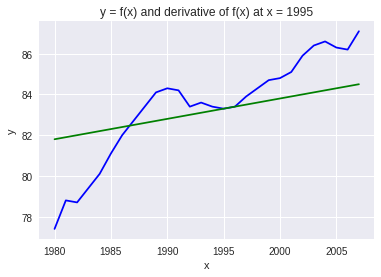

dx = 0.09999847999999645


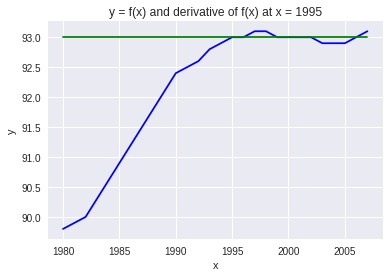

dx = 0.0


In [22]:
d_x = compute_and_plot_derivative(x4,y4,1995)
print("dx = {}".format(d_x))

d_x = compute_and_plot_derivative(x5,y5,1995)
print("dx = {}".format(d_x))

# Stretch Goal

Now that you can draw an tangent (derivative) line onto any function, it would be an awesome demo to animate it. Animate code that walks acros your dataset, drawing the tangent line on top of the function graph for each pair of `(i, i+1)` values.

In [0]:
def compute_derivative(x_values, y_values, ix):
    
    x_values, y_values = np.array(x_values), np.array(y_values)

    dx = (y_values[ix+1]-y_values[ix]) / (x_values[ix+1]-x_values[ix])
    tangent_line_b = y_values[ix] - (dx * x_values[ix])
    tangent_line_y = dx*x_values + tangent_line_b
    
    return tangent_line_y

In [0]:
x = np.linspace(-4, 4, 100)
y = np.sin(x)

In [0]:
fig, ax = plt.subplots()
plt.close()

ax.set_xlim((x.min(), x.max()))
ax.set_ylim((-2, 2))

f_x = ax.plot(x, y, lw=2)
line, = ax.plot([], [], lw=2)
point, = ax.plot([], [], 'ro')

In [0]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(x, compute_derivative(x, y, i))
    point.set_data(x[i], y[i])
    return (line,)

In [28]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(x)-1, interval=100, 
                               blit=True)
rc('animation', html='jshtml')
anim